In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
u        = np.load("../output/dudu0_primal.npy")
dudu0_ad = np.load("../output/dudu0_ad.npy")
dudu0_fd = np.load("../output/dudu0_fd.npy")

In [3]:
print(f"{u.shape        = }")
print(f"{dudu0_ad.shape = }")
print(f"{dudu0_fd.shape = }")

u.shape        = (101, 1)
dudu0_ad.shape = (101, 101)
dudu0_fd.shape = (101, 101)


In [4]:
print(f"{np.sum(dudu0_ad >= 1e-1) = }")
print(f"{np.sum(dudu0_fd >= 1e-1) = }")

np.sum(dudu0_ad >= 1e-1) = 178
np.sum(dudu0_fd >= 1e-1) = 178


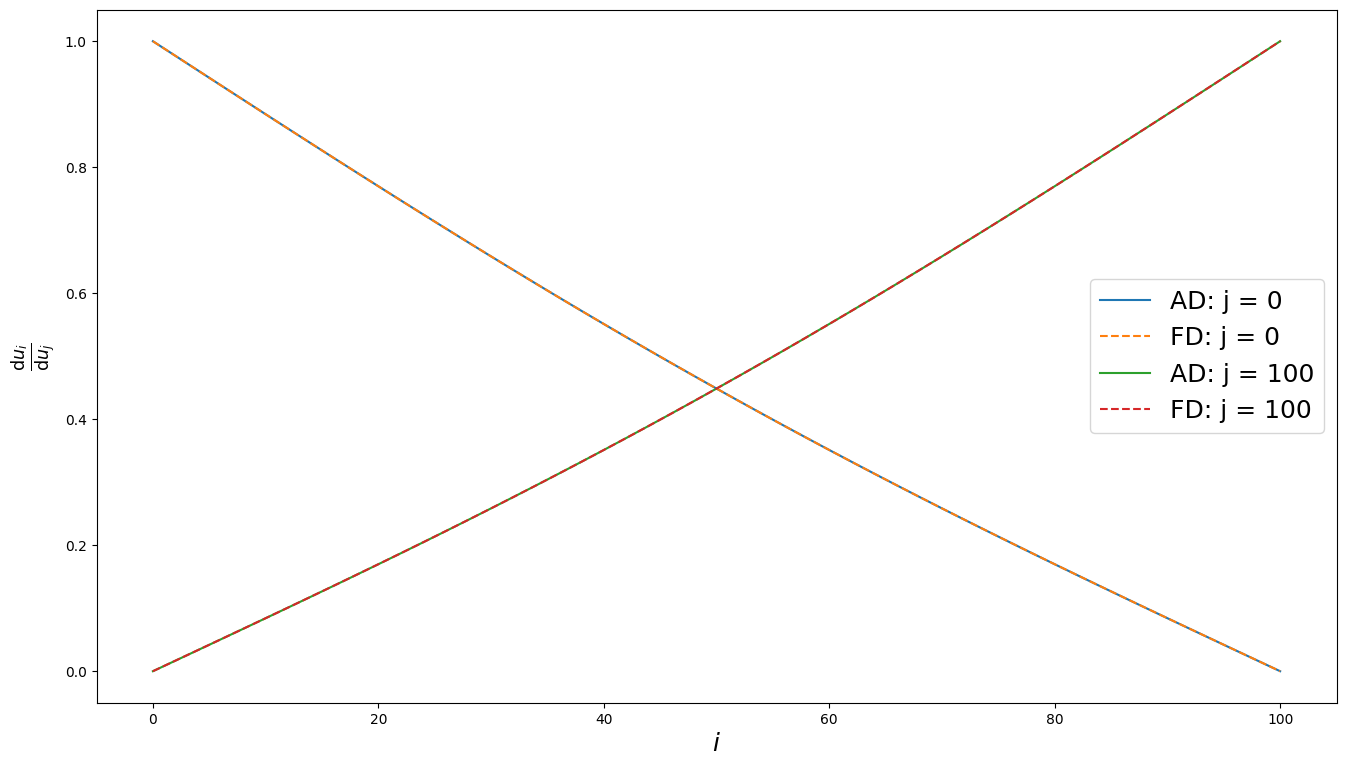

In [5]:
plt.figure(figsize=(16, 9))

plt.plot(range(dudu0_ad.shape[0]),
         dudu0_ad[:, 0],
         marker="." if dudu0_ad.shape[0] <= 100 else None,
         label="AD: j = 0")

plt.plot(range(dudu0_fd.shape[0]),
         dudu0_fd[:, 0],
         marker="." if dudu0_fd.shape[0] <= 100 else None,
         linestyle="--",
         label="FD: j = 0")

plt.plot(range(dudu0_ad.shape[0]),
         dudu0_ad[:, -1],
         marker="." if dudu0_ad.shape[0] <= 100 else None,
         label=f"AD: j = {dudu0_ad.shape[1]-1}")

plt.plot(range(dudu0_fd.shape[0]),
         dudu0_fd[:, -1],
         marker="." if dudu0_fd.shape[0] <= 100 else None,
         linestyle="--",
         label=f"FD: j = {dudu0_fd.shape[1]-1}")

plt.xlabel("$i$", fontsize=18)
plt.ylabel("$\\frac{\\mathrm{d}u_i}{\\mathrm{d}u_j}$", fontsize=18)
plt.legend(fontsize=18)

plt.show()

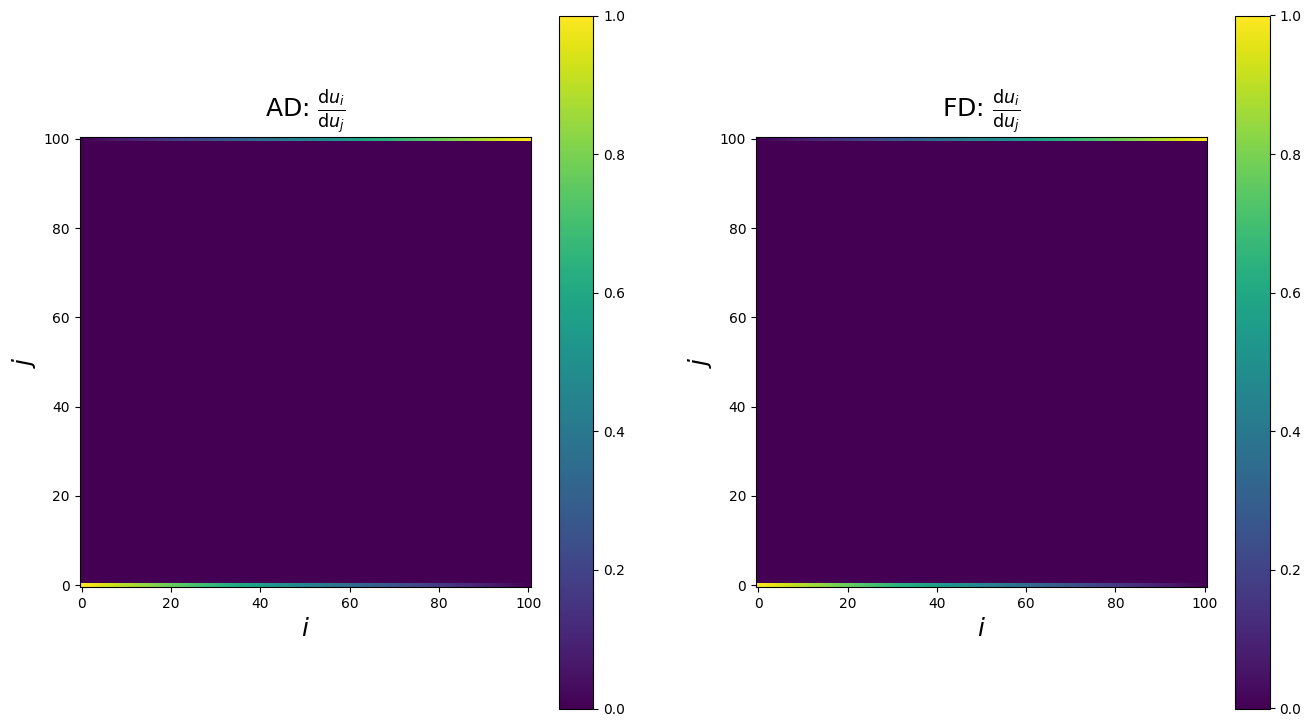

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 9))

c = ax[0].pcolormesh(range(dudu0_ad.shape[0]), range(dudu0_ad.shape[0]), dudu0_ad.T)
plt.colorbar(c)

ax[0].set_xlabel("$i$", fontsize=18)
ax[0].set_ylabel("$j$", fontsize=18)
ax[0].set_title("AD: $\\frac{\\mathrm{d}u_i}{\\mathrm{d}u_j}$", fontsize=18)

ax[0].set_box_aspect(1.0)

c = ax[1].pcolormesh(range(dudu0_fd.shape[0]), range(dudu0_fd.shape[0]), dudu0_fd.T)
plt.colorbar(c)

ax[1].set_xlabel("$i$", fontsize=18)
ax[1].set_ylabel("$j$", fontsize=18)
ax[1].set_title("FD: $\\frac{\\mathrm{d}u_i}{\\mathrm{d}u_j}$", fontsize=18)

ax[1].set_box_aspect(1.0)

plt.show()

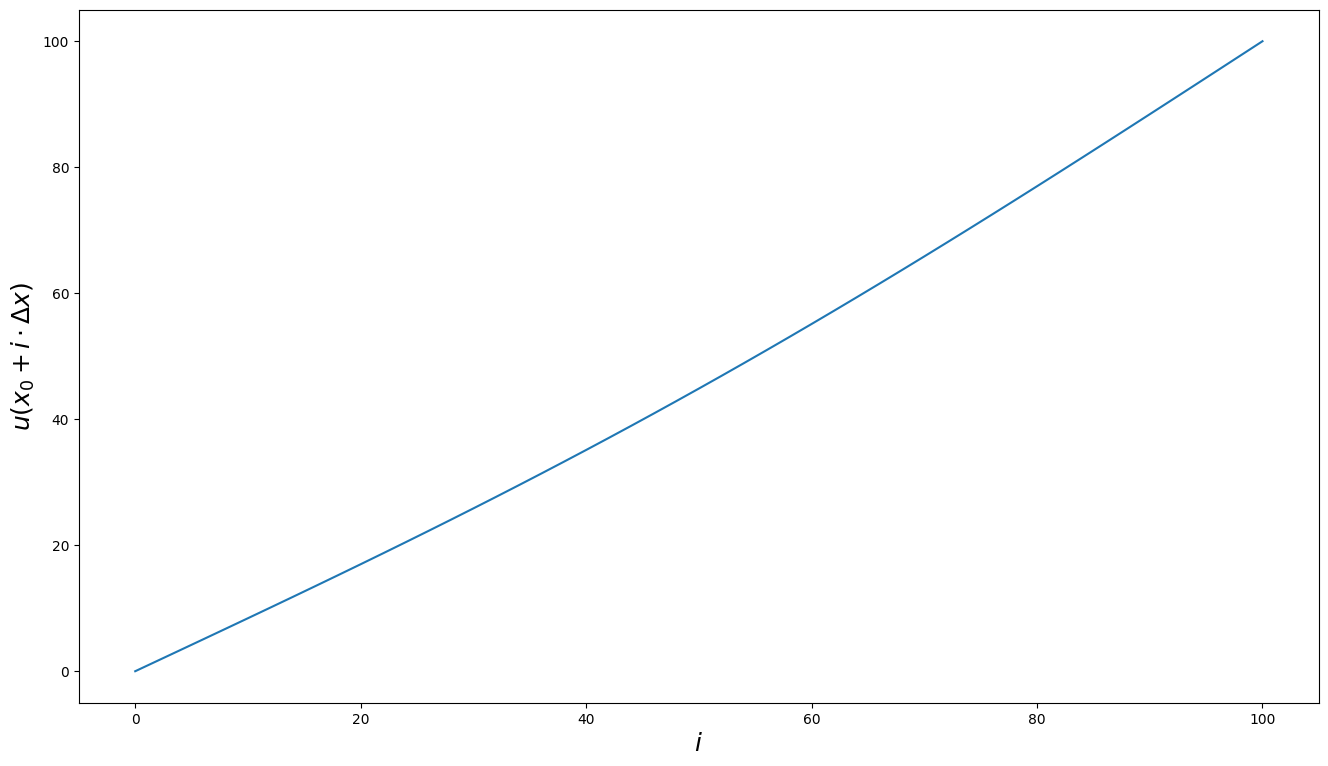

In [7]:
plt.figure(figsize=(16, 9))

plt.plot(range(u.shape[0]), u)

plt.xlabel("$i$", fontsize=18)
plt.ylabel("$u(x_0 + i \\cdot \\Delta x)$", fontsize=18)

plt.show()